### 1. 머신러닝의 비지도학습의 대표적인 모델과 기술들을 정리  

K-Means Clustering  
주어진 n개의 관측값을 k개의 클러스터로 분할하는 알고리즘으로, 관측 값들은 거리가 최소인 클러스터로 분류된다. 

1. 얼마나 많은 클러스터가 필요한지 결정(K를 설정) 
2. 초기 Centroid 선택 - 랜덤하게 설정 
3. 모든 데이터를 순회하며 각 데이터마다 가장 가까운 Centroid가 속해있는 클러스터로 assign.  
4. Centroid를 클러스터의 중심으로 이동  
5. 3,4 과정을 반복하면서 더 이상 Centroid가 변하지 않을 때까지 진행 

주성분 분석(PCA)  
고차원 데이터를 효과적으로 분석하기 위한 기법으로 차원을 축소하여 시각화하기 용이하다. PCA는 n개의 관측치와 p개의 변수로 구성된 데이터를 상관관계가 없는 k개의 변수로 구성된 데이터로 요약하는 방식으로, 이 때 요약된 변수는 기존 변수의 선형 조합으로 생성된다. 즉, 원래 데이터의 분산을 최대한 보존하는 새로운 축을 찾고, 그 축에 데이터를 projection 시키는 기법이다. 

PCA를 활용해 데이터의 분산이 가장 큰 축을 구하기 위해선 공분산 행렬을 통해 고유벡터와 고유값을 구해야 한다. 공분산 행렬의 고유값은 해당 방향의 분산 크기를 의미한다. PCA에서는 고유값이 클수록 해당 방향(고유벡터)이 더 중요한 정보를 담고 있다. 공분산 행렬의 고유벡터는 해당 방향을 나타내는 단위 벡터로, PCA에서는 주성분 축이 된다.     



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
# IRIS 데이터셋
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [13]:
# target 값은 0, 1, 2 세 가지로 구성되어 있음, 0이면 Setosa, 1이면 Versicolor, 2이면 Virginica
df['target'] = df['target'].astype(int)

df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [14]:
features = ['petal length (cm)', 'petal width (cm)'] # 'sepal length (cm)', 'sepal width (cm)', 
x = df.loc[:, features].values
y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

tagert 0 = cluster 1  
target 1 = cluster 0  
target 2 = cluster 2  

In [15]:
# K-means 클러스터링 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

# 비지도 학습 결과를 cluster 컬럼에 저장
df['cluster'] = kmeans.labels_

df['cluster'] = df['cluster'].map({1: 0, 0: 1, 2: 2})

df.head()

# target과 cluster 값이 다른 경우를 찾아봄
mismatch_count = (df['cluster'] != df['target']).sum()
print(f'Number of rows where cluster and target values differ: {mismatch_count}')

mismatch_df = df[df['cluster'] != df['target']]
mismatch_df

Number of rows where cluster and target values differ: 94


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
50,7.0,3.2,4.7,1.4,1,2
51,6.4,3.2,4.5,1.5,1,2
52,6.9,3.1,4.9,1.5,1,2
53,5.5,2.3,4.0,1.3,1,2
54,6.5,2.8,4.6,1.5,1,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


실제 정답과 비지도 학습방법인 K-Means clustering으로 구한 레이블을 비교해본 결과 1과 2에서 값이 다른 경우가 존재했다. 
그 이유를 찾기 위해 붓꽃들의 sepal length, sepal width, petal length, petal width를 비교해보았다. 
레이블 1과 2에서 차이가 거의 존재하지 않았기 때문에 클러스터링을 할 때 분류가 제대로 되지 못한 것이다.  
변수 중에서 sepal에서 레이블 간의 차이가 거의 존재하지 않았다.  
따라서 sepal length, width 변수는 제외하고 클러스터링을 진행했다. 

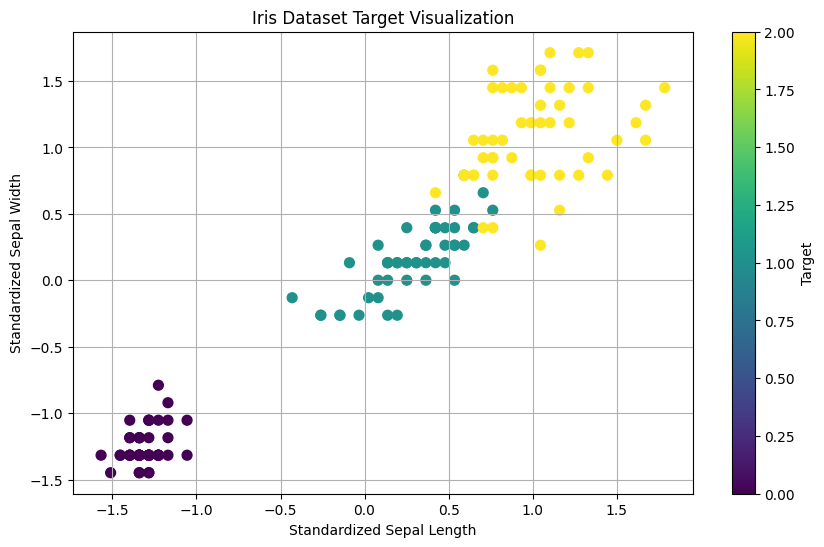

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=df['target'], cmap='viridis', s=50)
plt.title('Iris Dataset Target Visualization')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.colorbar(label='Target')
plt.grid()
plt.show()

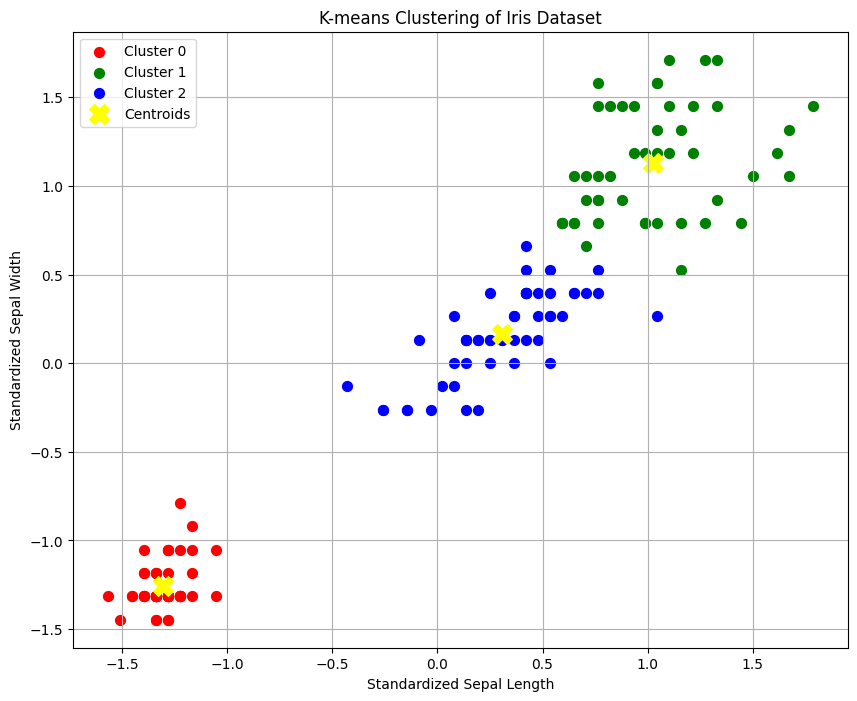

In [20]:
# 클러스터 결과 시각화
plt.figure(figsize=(10, 8))

# 클러스터별로 색상 지정
colors = ['r', 'g', 'b']
for i in range(3):
  plt.scatter(x[df['cluster'] == i, 0], x[df['cluster'] == i, 1], 
        s=50, c=colors[i], label=f'Cluster {i}')

# 클러스터 중심 시각화
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', label='Centroids', marker='X')

plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.legend()
plt.grid()
plt.show()

주성분 분석을 한 후에 다시 클러스터링 시도해보기로 했다.  

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


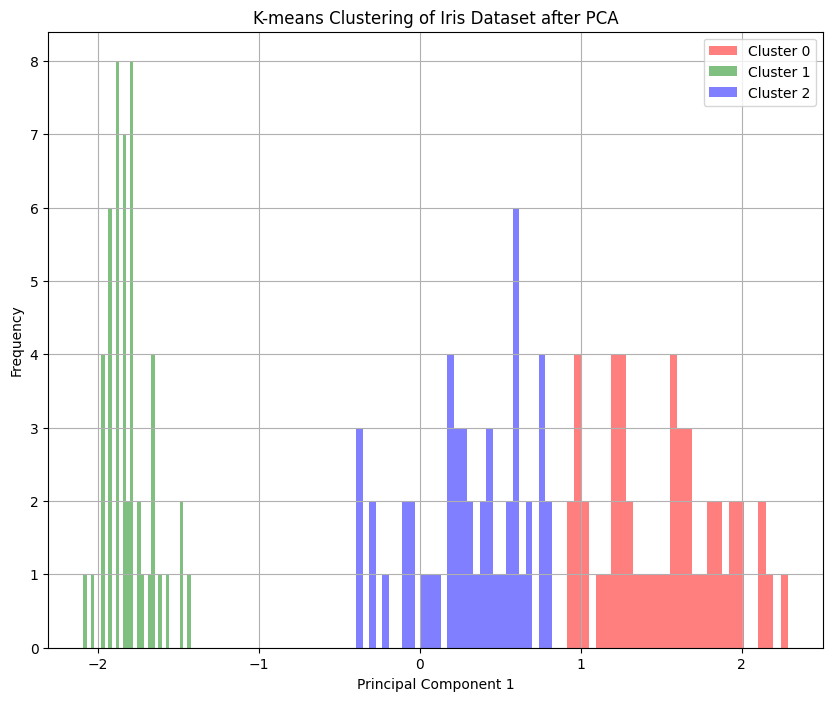

In [23]:
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=1) # n_components는 주성분의 수
principal_components = pca.fit_transform(x) # PCA 수행, principal_components는 2차원으로 축소된 데이터

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1']) # principal component 1 axis가 가장 고유값이 큰 축, principal component 2 axis가 두번째로 고유값이 큰 축

# K-means 클러스터링 다시 수행
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(principal_components)

# 클러스터 결과를 데이터프레임에 추가
pca_df['cluster'] = kmeans_pca.labels_

# 클러스터 결과 시각화 (히스토그램)
plt.figure(figsize=(10, 8))

# 클러스터별로 색상 지정
colors = ['r', 'g', 'b']
for i in range(3):
    plt.hist(pca_df[pca_df['cluster'] == i]['principal component 1'], 
             bins=30, alpha=0.5, color=colors[i], label=f'Cluster {i}')

plt.title('K-means Clustering of Iris Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()